In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model

In [2]:
test_preprocessed_images = np.load('../test_preproc_CNN.npy')

In [20]:
model_path = '../weather_pred/CNN_model_256_with_Aug_big.h5'

In [21]:
model_Cnn_with_Aug = load_model(model_path)

In [22]:
#Prediction Function
array = model_Cnn_with_Aug.predict(test_preprocessed_images, batch_size=1, verbose=1)
y_pred = np.argmax(array, axis=1)

30/30 [==============================] - 6s 79ms/step


In [23]:
test_df = pd.read_csv('../dataset/test.csv')
y_true = test_df['labels']

In [24]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, y_pred)

In [25]:
train_dir = '../weather_pred/Data/training/'
classes = os.listdir(train_dir)

In [26]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        
    else:
        cm=cm
        
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

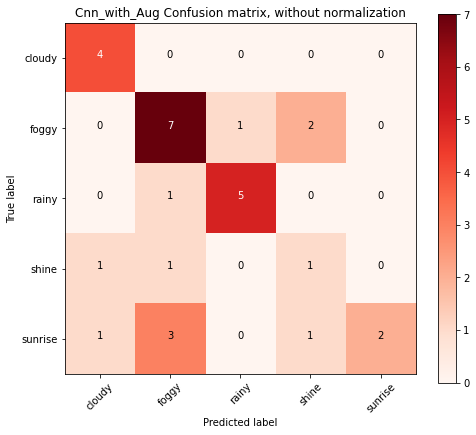

In [27]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
    plot_confusion_matrix(conf_mat, classes=classes, title='Cnn_with_Aug Confusion matrix, without normalization')
plt.show()

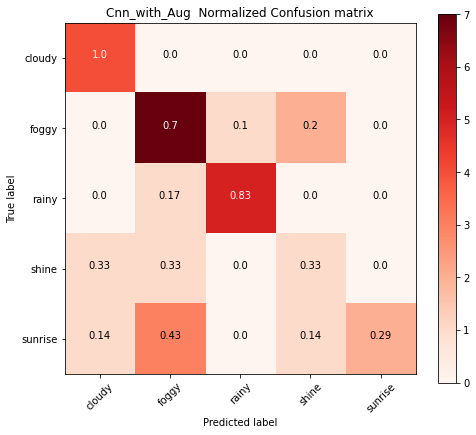

In [28]:
np.set_printoptions(precision=2)

fig2 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, normalize = True, title='Cnn_with_Aug  Normalized Confusion matrix')
fig2.savefig('../cm_norm.jpg')
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

      cloudy       0.67      1.00      0.80         4
       foggy       0.58      0.70      0.64        10
       rainy       0.83      0.83      0.83         6
       shine       0.25      0.33      0.29         3
     sunrise       1.00      0.29      0.44         7

    accuracy                           0.63        30
   macro avg       0.67      0.63      0.60        30
weighted avg       0.71      0.63      0.62        30



In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.6333333333333333

In [29]:
model_path2 = '../weather_pred/CNN_model_256_without_Aug1.h5'

In [31]:
model_Cnn_Without_Aug = load_model(model_path2)

In [32]:
#Prediction Function
array2 = model_Cnn_Without_Aug.predict(test_preprocessed_images, batch_size=1, verbose=1)
y_pred2 = np.argmax(array2, axis=1)

30/30 [==============================] - 1s 11ms/step


In [35]:

conf_mat2 = confusion_matrix(y_true, y_pred2)

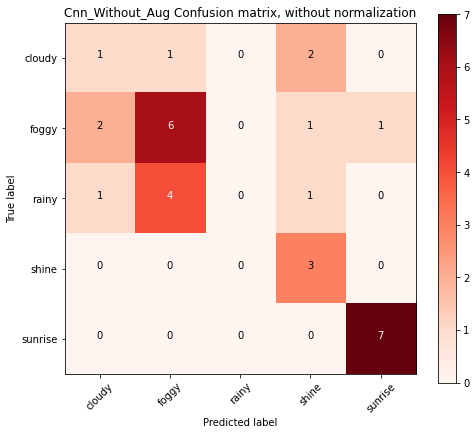

In [36]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat2, classes=classes, title='Cnn_Without_Aug Confusion matrix, without normalization')
plt.show()

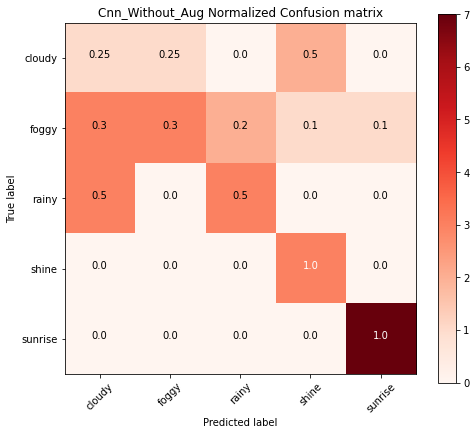

In [17]:
np.set_printoptions(precision=2)

fig2 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, normalize = True, title='Cnn_Without_Aug Normalized Confusion matrix')
fig2.savefig('../cm_norm.jpg')
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred2, target_names=classes))

              precision    recall  f1-score   support

      cloudy       0.25      0.25      0.25         4
       foggy       0.55      0.60      0.57        10
       rainy       0.00      0.00      0.00         6
       shine       0.43      1.00      0.60         3
     sunrise       0.88      1.00      0.93         7

    accuracy                           0.57        30
   macro avg       0.42      0.57      0.47        30
weighted avg       0.46      0.57      0.50        30



In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred2)

0.5666666666666667